### ANGGOTA KELOMPOK 2 PRAKTIKUM PEMBELAJARAN MESIN : <br>
| NIM | NAMA |
|---------|-----------|
| 121450015 | Mujadid Choirus Surya |
| 121450018 | Balqis Dwian Fitri Zamzami |
| 121450042 | Sylviani Primaastuti Ananda |
| 121450108 | Vanessa Olivia Rose |
| 121450156 | Muhammad Fahrul Aditya |

# Tugas Kelompok Modul 2

Buatlah perancangan model dengan menggunakan multiple linear regresi jika studi kasus dibawah ini:

![Alt text](image.png)

# INI JAWABANNYA


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [126]:
# Impor data dari file CSV
df = pd.read_csv('dataset.csv')
df.head()

,Daerah,Penjualan,Promosi,Outlet,Laju Penduduk,Pesaing,Income
0,Jakarta,205,26,159,2.00,15,5.46
1,Tangerang,206,28,164,1.50,16,2.43
2,Bekasi,254,35,198,1.75,19,2.56
3,Bogor,246,31,184,1.64,17,3.55
4,Bandung,201,21,150,2.65,11,4.35


In [127]:
df.describe()

,Penjualan,Promosi,Outlet,Laju Penduduk,Pesaing,Income
count,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000
mean,246.400000,34.666667,187.933333,1.983333,16.20000,3.328000
std,41.112737,9.678154,38.087243,0.507003,3.87667,0.922134
min,201.000000,21.000000,149.000000,1.350000,10.00000,2.430000
25%,207.500000,29.000000,161.500000,1.580000,14.00000,2.555000
50%,245.000000,31.000000,184.000000,1.750000,16.00000,3.010000
75%,275.500000,41.000000,199.500000,2.535000,18.50000,3.600000
max,322.000000,54.000000,287.000000,2.740000,24.00000,5.460000


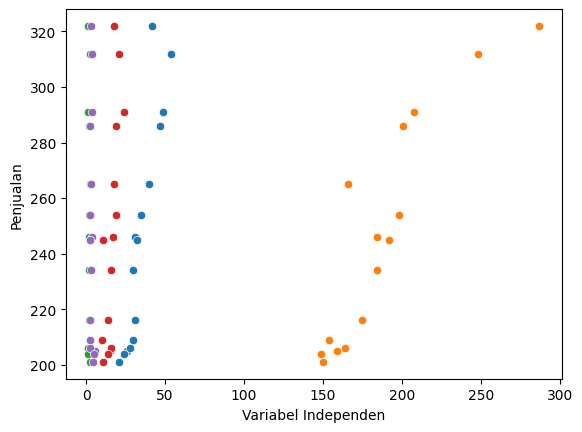

In [128]:
import seaborn as sns


# Contoh DataFrame (pastikan Anda punya DataFrame sesuai dengan nama 'df')
# df = pd.DataFrame(data)

# Membuat scatter plot
sns.scatterplot(x='Promosi', y='Penjualan', data=df)
sns.scatterplot(x='Outlet', y='Penjualan', data=df)
sns.scatterplot(x='Laju Penduduk', y='Penjualan', data=df)
sns.scatterplot(x='Pesaing', y='Penjualan', data=df)
sns.scatterplot(x='Income', y='Penjualan', data=df)

# Menambahkan label untuk sumbu x dan y
plt.xlabel('Variabel Independen')
plt.ylabel('Penjualan')

# Menampilkan plot
plt.show()


In [129]:
X = df[['Promosi','Outlet','Laju Penduduk','Pesaing','Income']]
y = df['Penjualan']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=2)

In [130]:
regressi = LinearRegression()
regressi.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressi.coef_, X.columns,
                        columns=['Koefisien'])
coeff_df

,Koefisien
Promosi,1.622738
Outlet,0.590052
Laju Penduduk,5.686180
Pesaing,1.677556
Income,0.225662


In [131]:
y_pred = regressi.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
11,286,275.581280
4,201,196.087596
5,291,290.574131


In [132]:
print("Intercept:", regressi.intercept_)

Intercept: 38.999177170186215


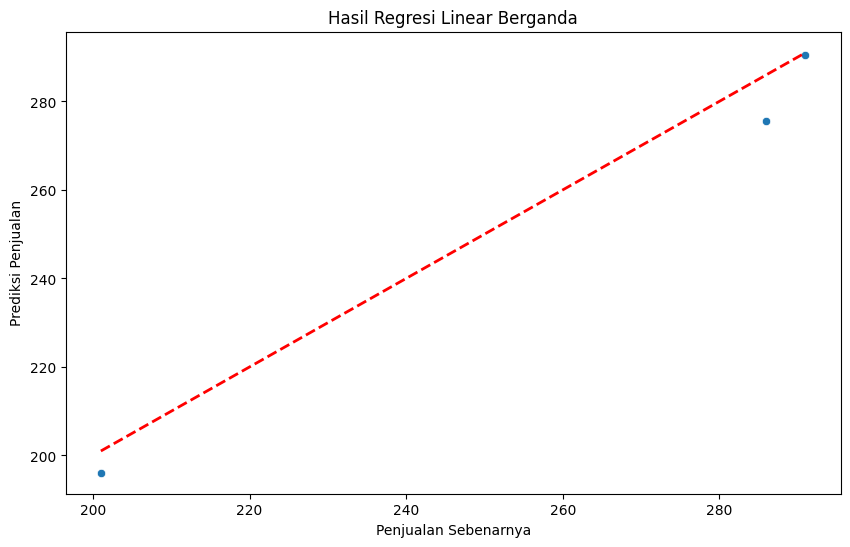

In [133]:
# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# Scatter plot data uji
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Penjualan Sebenarnya")
plt.ylabel("Prediksi Penjualan")
plt.title("Hasil Regresi Linear Berganda")

# Menampilkan garis regresi pada scatter plot
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.show()

In [134]:
# Evaluasi Model

print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))

Mean Absolute Error:  5.25233129637662
Mean Squared Error :  44.28760274563363
